<h1>Elegiremos como ejemplo el modelo de Regresión Logística</h1>

<h1>1.Análisis Exploratorio de Datos (EDA)</h1>


In [107]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('C:/Users/Windows 10/Downloads/Titanic-Dataset (1).csv')
df.head(30)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Inspeccionar datos

In [116]:
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Valores faltantes por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [162]:
print(data.columns)


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S',
       'Sex_male_True', 'Embarked_Q_True'],
      dtype='object')


In [166]:
# Ajusta la selección de columnas con los nombres correctos
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male_True', 'Embarked_Q_True', 'Embarked_S']]


In [170]:
print(data.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male_True',
       'Embarked_Q_True', 'Embarked_S'],
      dtype='object')


<h1>2.Preprocesamiento de datos</h1>

In [209]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Selección de columnas relevantes
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male_True', 'Embarked_Q_True', 'Embarked_S']]

# Manejar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)  # Imputar edades con la mediana
data['Embarked_Q_True'].fillna(data['Embarked_Q_True'].mode()[0], )  # Imputar puertos con la moda
data['Embarked_S'].fillna(data['Embarked_S'].mode()[0], )  # Imputar puertos con la moda




C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2468\3736264142.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Imputar edades con la mediana


0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889    False
890    False
Name: Embarked_S, Length: 891, dtype: bool

<h1>3.Selección de características</h1>

In [211]:
from sklearn.feature_selection import SelectKBest, chi2

X = data.drop('Survived', axis=1)
y = data['Survived']
scaler = StandardScaler()
data['Fare'] = scaler.fit_transform(data[['Fare']])

# Selección de las 5 mejores características
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]


<h1>4.División del dataset</h1>

In [190]:
from sklearn.model_selection import train_test_split

X = data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1>5.Entrenamiento del modelo</h1>

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Dividir en variables predictoras (X) y objetivo (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")



Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]


<h1>6.Evaluación del modelo</h1>

In [217]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Matriz de Confusión:
 [[90 15]
 [19 55]]


<h1>7. Visualización de resultados</h1>

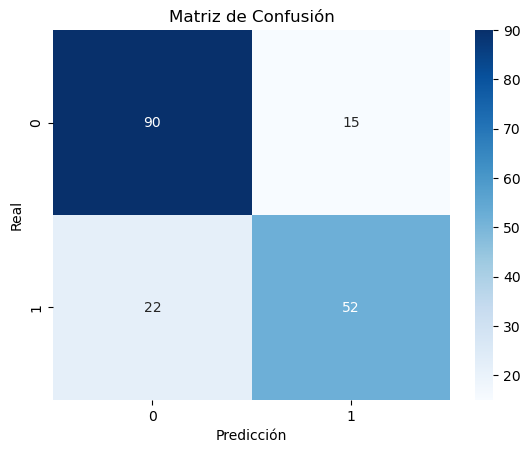

In [199]:
# Matriz de Confusión visual
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


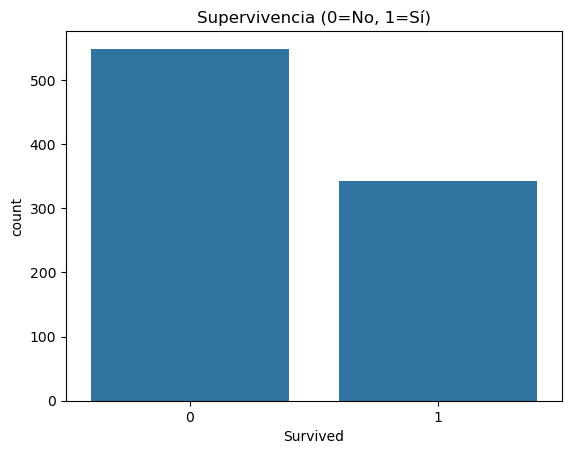

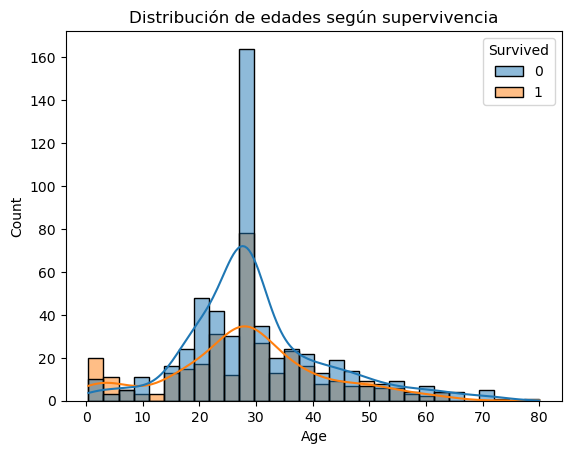

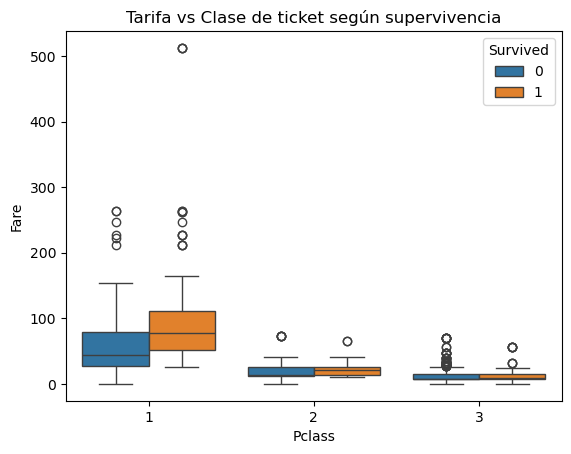

In [203]:
#Distribuciones y relaciones
sns.countplot(data=data, x='Survived')
plt.title('Supervivencia (0=No, 1=Sí)')
plt.show()

sns.histplot(data=data, x='Age', hue='Survived', kde=True)
plt.title('Distribución de edades según supervivencia')
plt.show()

sns.boxplot(data=data, x='Pclass', y='Fare', hue='Survived')
plt.title('Tarifa vs Clase de ticket según supervivencia')
plt.show()